In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [69]:
df = pd.read_csv('../Datasets/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [70]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [71]:
target_column = df['Species']
print(target_column.unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [72]:
df1 = df
print(df1.shape)
X = df1.iloc[:,1:]
y = df1.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

(159, 7)
X_train:  (127, 6)
X_test:  (32, 6)
y_train:  (127,)
y_test:  (32,)


In [73]:
le = LabelEncoder()

le.fit(y_train)

LabelEncoder()

In [74]:
le.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [75]:
le.transform(y_train)

array([1, 4, 2, 2, 2, 0, 3, 0, 2, 2, 2, 0, 3, 2, 1, 4, 3, 4, 1, 2, 0, 0,
       1, 4, 2, 2, 4, 4, 1, 5, 6, 1, 6, 0, 2, 2, 4, 5, 4, 2, 0, 2, 2, 0,
       4, 2, 4, 2, 0, 4, 5, 4, 0, 2, 6, 2, 2, 5, 0, 2, 2, 3, 2, 2, 2, 3,
       2, 0, 2, 0, 0, 0, 5, 4, 5, 1, 2, 3, 2, 4, 2, 0, 2, 3, 0, 2, 1, 3,
       4, 0, 5, 3, 5, 6, 2, 2, 3, 4, 0, 0, 5, 3, 0, 0, 2, 2, 1, 3, 0, 5,
       0, 0, 2, 2, 3, 0, 0, 4, 2, 1, 0, 2, 5, 3, 5, 0, 2])

In [76]:
pd.Series(y_train)

66     Parkki
46      Roach
108     Perch
102     Perch
104     Perch
        ...  
148     Smelt
137      Pike
156     Smelt
15      Bream
99      Perch
Name: Species, Length: 127, dtype: object

In [77]:
pd.Series(le.transform(y_train))

0      1
1      4
2      2
3      2
4      2
      ..
122    5
123    3
124    5
125    0
126    2
Length: 127, dtype: int32

In [78]:
le.transform(y_test)

array([5, 6, 2, 2, 3, 0, 2, 3, 6, 2, 2, 0, 4, 2, 4, 2, 2, 0, 0, 2, 2, 0,
       5, 2, 2, 3, 4, 2, 1, 2, 2, 0])

#### 1) DecisionTreeClassifier

In [79]:
dt_clf = DecisionTreeClassifier(max_depth=4,criterion='entropy')
model1 = dt_clf.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print(y_pred)


['Smelt' 'Parkki' 'Perch' 'Perch' 'Pike' 'Bream' 'Perch' 'Pike' 'Parkki'
 'Perch' 'Perch' 'Bream' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Bream'
 'Bream' 'Perch' 'Perch' 'Bream' 'Smelt' 'Perch' 'Perch' 'Pike' 'Perch'
 'Perch' 'Parkki' 'Perch' 'Perch' 'Bream']


In [80]:
acc = accuracy_score(y_true=y_test,y_pred=y_pred)
print(f"Accuracy DT: {acc*100}")

Accuracy DT: 84.375


##### As label encoder encodes values in natural order I am trying to get the order using a simple logic in the following code you can always use <code>Le.inverse_transform(y_pred)</code>
##### Here is the code
    # Sequential order 
    def assignNumericValue(target_column):
        item_dict = {}
        items = target_column.unique()
        for i,item in enumerate(items):
            if item not in item_dict:
                item_dict[item] = i
        return item_dict

    # Natural order
    def assignNumericValue(target_column):
        item_dict = {}
        items = list(target_column.unique())
        # Sort in alphabetical order
        items.sort()
        # For reverse order 
        # rev = sorted(columns,reverse=True)
        for i,item in enumerate(items):
            if item not in item_dict:
                item_dict[item] = i
        return item_dict

In [81]:
# Natural order
def assignNumericValue(target_column):
    item_dict = {}
    items = list(target_column.unique())
    # Sort in alphabetical order
    items.sort()
    # For reverse order 
    # rev = sorted(columns,reverse=True)
    for i,item in enumerate(items):
        if item not in item_dict:
            item_dict[item] = i
    return item_dict

In [82]:
tgt_col = df1['Species']
l1 = assignNumericValue(tgt_col)
cm_plot_labels = l1.keys()
print(cm_plot_labels)

dict_keys(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'])


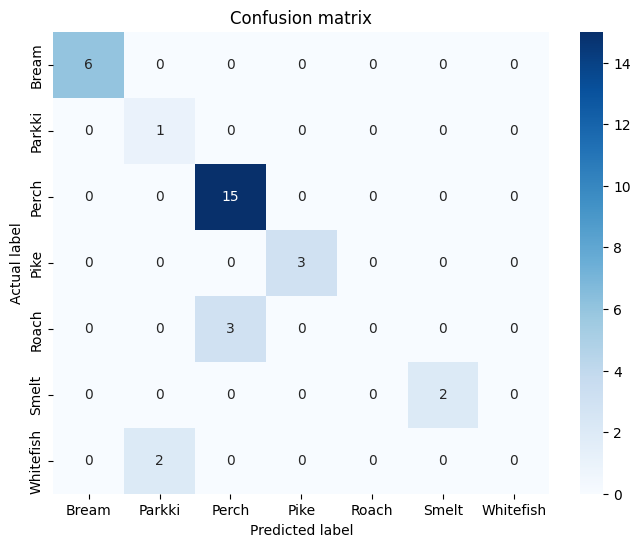

In [83]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=cm_plot_labels,yticklabels=cm_plot_labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion matrix')
plt.show()

##### Gnerating the tree

In [86]:
from sklearn.tree import export_graphviz
from graphviz import Source

feature_names =list(X.columns)
class_names = list(cm_plot_labels)
with open("./Images/fish.dot",'w') as f:
    export_graphviz(
        model1,
        out_file= f,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,filled=True
    )

dot_path = "./Images/fish.dot" 
output = Source.from_file(dot_path,format='png')
output.view()


'Images\\fish.dot.png'

##### 2) Navie Bayes

In [ ]:
nv_clf = GaussianNB()
model2 = nv_clf.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
print(y_pred2)

['Smelt' 'Perch' 'Roach' 'Roach' 'Pike' 'Bream' 'Roach' 'Pike' 'Roach'
 'Perch' 'Roach' 'Bream' 'Perch' 'Whitefish' 'Roach' 'Perch' 'Roach'
 'Bream' 'Bream' 'Whitefish' 'Whitefish' 'Bream' 'Smelt' 'Roach'
 'Whitefish' 'Perch' 'Roach' 'Roach' 'Parkki' 'Whitefish' 'Parkki' 'Bream']


In [ ]:
acc_nb = accuracy_score(y_true=y_test,y_pred=y_pred2)
print(f"Accuraccy NBClf: {acc_nb*100}")

Accuraccy NBClf: 46.875


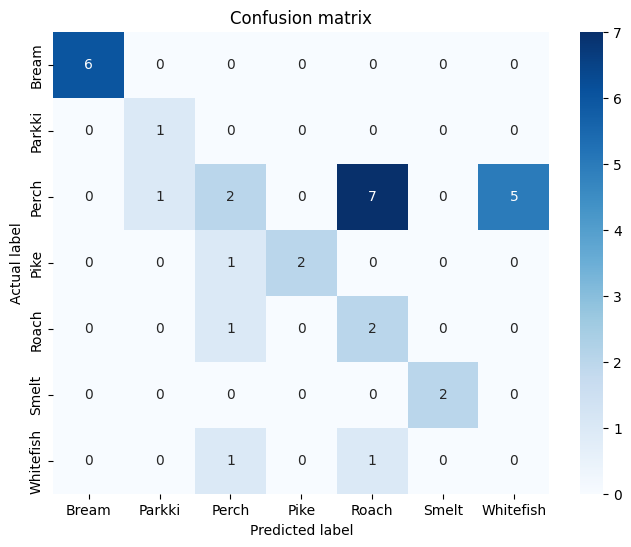

In [ ]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred2)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=cm_plot_labels,yticklabels=cm_plot_labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion matrix')
plt.show()

##### RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=20,random_state=42)
model3 = rf_clf.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
print(y_pred3)

['Smelt' 'Perch' 'Perch' 'Perch' 'Pike' 'Bream' 'Perch' 'Pike' 'Perch'
 'Perch' 'Roach' 'Bream' 'Perch' 'Perch' 'Roach' 'Smelt' 'Roach' 'Bream'
 'Bream' 'Perch' 'Perch' 'Bream' 'Smelt' 'Perch' 'Perch' 'Pike' 'Roach'
 'Roach' 'Parkki' 'Roach' 'Perch' 'Bream']


In [ ]:
acc_nb = accuracy_score(y_true=y_test,y_pred=y_pred3)
print(f"Accuraccy NBClf: {acc_nb*100}")

Accuraccy NBClf: 75.0


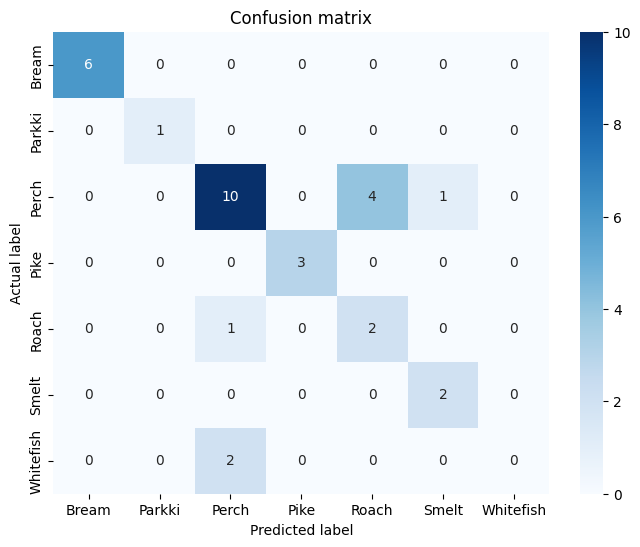

In [ ]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred3)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=cm_plot_labels,yticklabels=cm_plot_labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion matrix')
plt.show()